**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4033 - Visión computacional para imágenes y video**

Tecnológico de Monterrey

Prof Gilberto Ochoa Ruiz

**Semana 2**
Procesamiento Simple de Imágenes

---

**Equipo 23**

|                 NOMBRE              | MATRÍCULA |
|-------------------------------------|-----------|
| David Alexis García Espinosa        | A0        |
| Jorge Santana Mendoza               | A01376306 |
| José Manuel Romo Peredo             | A0        |
| Luis Daniel Ortega Muñoz            | A01795197 |
| Luis Fernando Caporal Montes de Oca | A01795898 |

# 1. Simple Image Operations

## Table of Contents
1. [Libraries](#libraries)
2. [Loading Images](#loading)
3. [Resizing Images](#resize)
4. [Negative Images](#negative)
5. [Logarithmic Transformation](#log)
6. [Image Binarizer](#bin)
7. [Image Quantizer](#quant)
8. [Exercises](#exer)
9. [References](#refer)

## Importing Libraries <a class="anchor" id="libraries" ></a>

In [57]:
from matplotlib import image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2

## Loading Images <a class="anchor" id="loading"></a>

<class 'numpy.ndarray'>


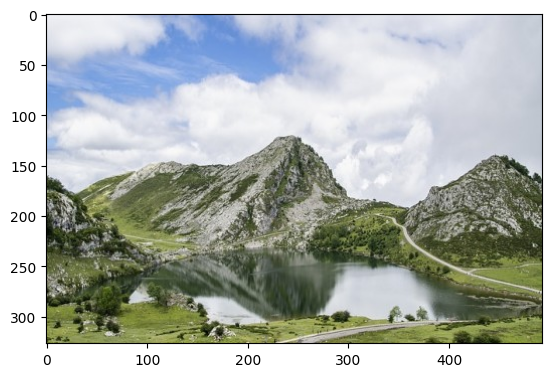

In [79]:
img1 = mpimg.imread('data/image.jpg')
plt.imshow(img1)
print(type(img1))

Look at the shape of this array:

In [59]:
img1.shape

(327, 493, 3)

The image is actually composed of three "layers, or *channels*, for red, green, and blue (RGB) pixel intensities.

Display the same image but this time we'll use another popular Python library for working with images - **cv2**.

numpy.ndarray

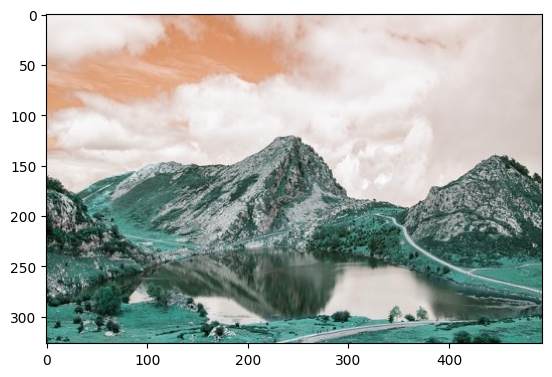

In [60]:
img2 = cv2.imread('data/image.jpg')
plt.imshow(img2)
type(img2)

The trouble is that cv2 loads the array of image data with the channels ordered as blue, green, red (BGR) instead of red, green blue (RGB).

Let's fix that

AxesImage(shape=(327, 493, 3))


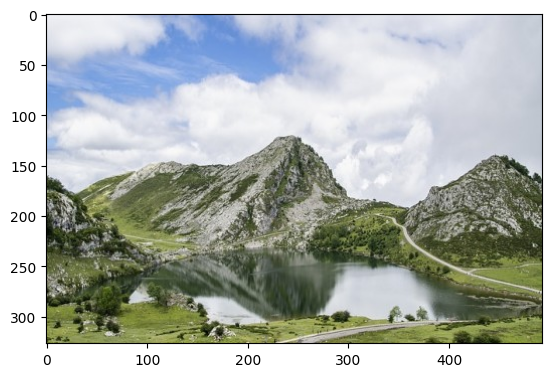

In [61]:
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
print(plt.imshow(img2))

Lastly, one more commonly used library for image processing in Python we should consider - **PIL**:

<class 'PIL.JpegImagePlugin.JpegImageFile'>


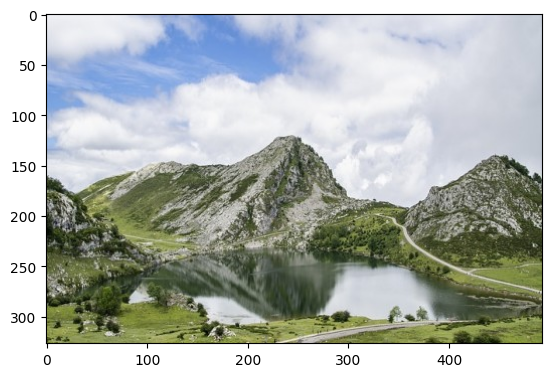

In [62]:
from PIL import Image
import matplotlib.pyplot as plt

img3 = Image.open('data/image.jpg')
plt.imshow(img3)
print(type(img3))

It's easy to convert a PIL JpegImageFile to a numpy array

In [63]:
img3 = np.array(img3)
img3.shape

(327, 493, 3)

Saving a numpy array in an optimized format, should you need to persist images into storage

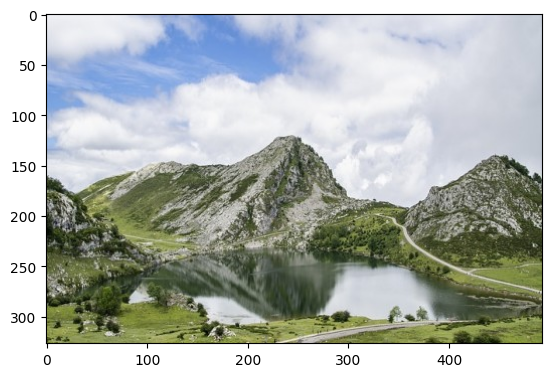

In [64]:
# Save the image
np.save('data/img.npy', img3)

# Load the image
img3 = np.load('data/img.npy')

plt.imshow(img3)

## Resizing an Image <a class="anchor" id="resize"></a>
One of the most common manipulations of an image is to resize it.

Generally, we want to ensure that all of your training images have consistent dimensions.

Original size: 493 x 327
New size: 200 x 200


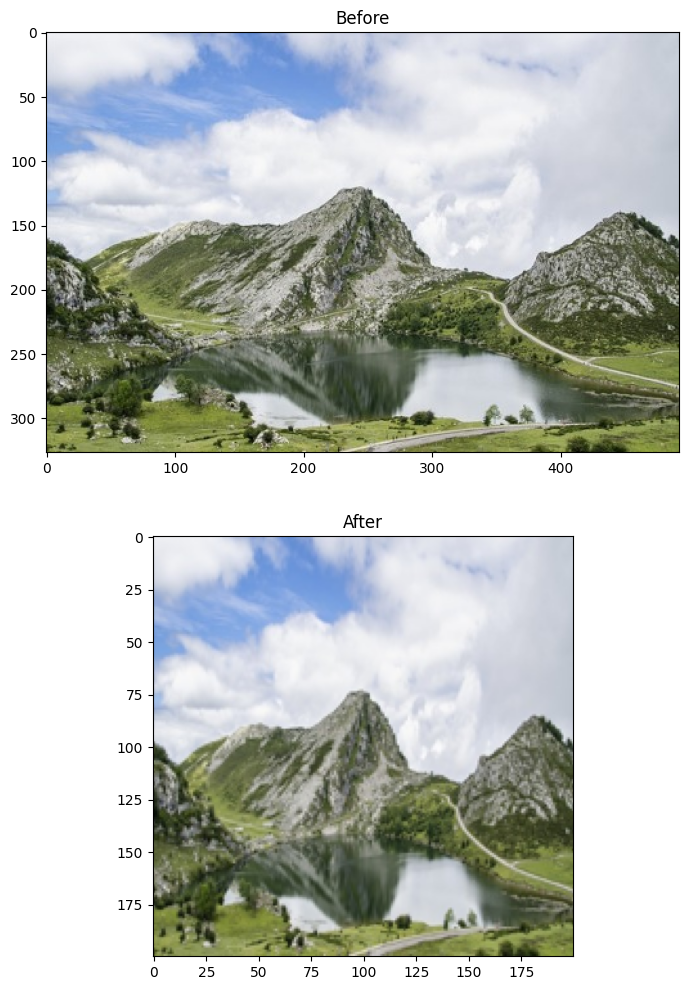

In [65]:
from PIL import Image, ImageOps

# Load the image array into a PIL Image
orig_img = Image.fromarray(img3)

# Get the image size
o_h, o_w = orig_img.size
print('Original size:', o_h, 'x', o_w)

# We'll resize this so it's 200 x 200
target_size = (200,200)
new_img = orig_img.resize(target_size)
n_h, n_w = new_img.size
print('New size:', n_h, 'x', n_w)

# Show the original and resized images
# Create a figure
fig = plt.figure(figsize=(12, 12))

# Subplot for original image
a=fig.add_subplot(2,1,1)
imgplot = plt.imshow(orig_img)
a.set_title('Before')

# Subplot for resized image
a=fig.add_subplot(2,1,2)
imgplot = plt.imshow(new_img)
a.set_title('After')

plt.show()


If we want to resize the image and change its shape without distorting it, we'll need to *scale* the image so that its largest dimension fits our new desired size.

Original size: 493 x 327
Scaled size: 200 x 133
New size: 200 x 200


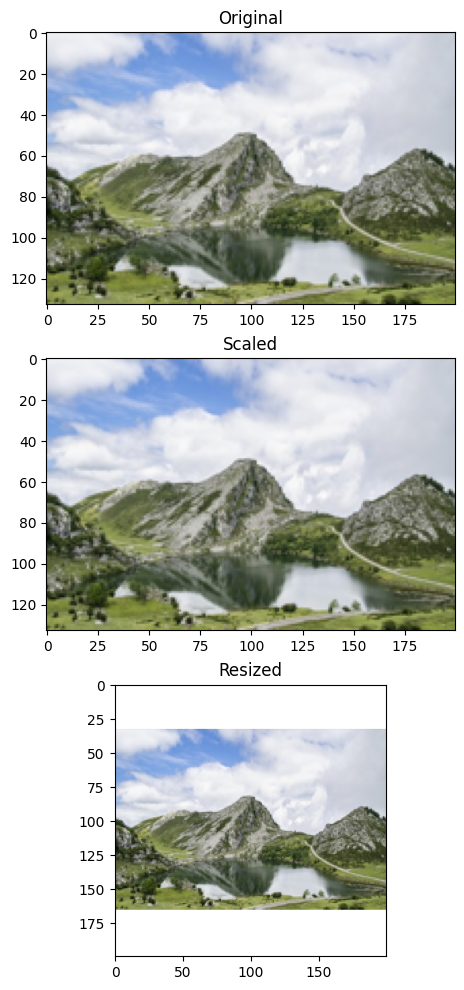

In [66]:
# Get the image size
orig_height, orig_width = orig_img.size
print('Original size:', orig_height, 'x', orig_width)

# We'll resize this so it's 200 x 200
target_size = (200,200)

# Scale the image to the new size using the thumbnail method
scaled_img = orig_img
scaled_img.thumbnail(target_size)
scaled_height, scaled_width = scaled_img.size
print('Scaled size:', scaled_height, 'x', scaled_width)

# Create a new white image of the target size to be the background
new_img = Image.new("RGB", target_size, (255, 255, 255))

# paste the scaled image into the center of the white background image
new_img.paste(scaled_img, (int((target_size[0] - scaled_img.size[0]) / 2), int((target_size[1] - scaled_img.size[1]) / 2)))
new_height, new_width = new_img.size
print('New size:', new_height, 'x', new_width)

# Show the original and resized images
# Create a figure
fig = plt.figure(figsize=(12, 12))

# Subplot for original image
a=fig.add_subplot(3,1,1)
imgplot = plt.imshow(orig_img)
a.set_title('Original')

# Subplot for scaled image
a=fig.add_subplot(3,1,2)
imgplot = plt.imshow(scaled_img)
a.set_title('Scaled')

# Subplot for resized image
a=fig.add_subplot(3,1,3)
imgplot = plt.imshow(new_img)
a.set_title('Resized')

plt.show()

## Negative Images <a class="anchor" id="negative"></a>

In [67]:
orig_img = cv2.imread('data/image.jpg')
orig_img = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)
img_neg = 255 - orig_img

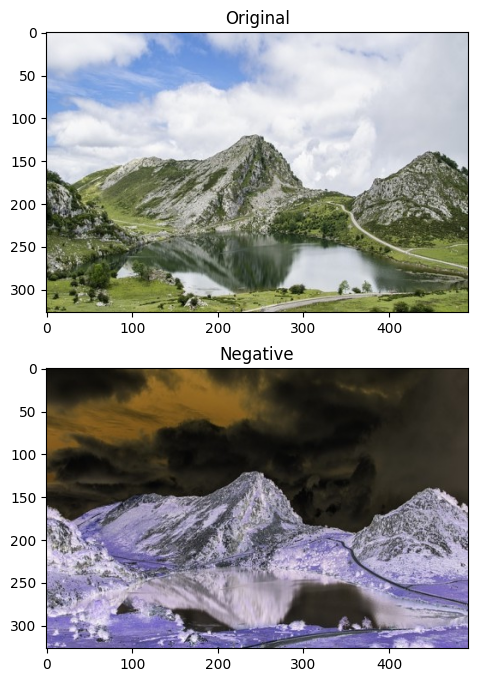

In [68]:
fig = plt.figure(figsize=(8, 8))

# Subplot for original image
a=fig.add_subplot(2,1,1)
imgplot = plt.imshow(orig_img)
a.set_title('Original')

a = fig.add_subplot(2,1,2)
imgplot = plt.imshow(img_neg)
a.set_title('Negative')

plt.show()

## Logarithmic Transformation <a class="anchor" id="log"></a>

$$
S = c * log (1 + r)
$$

where,
- $R$ = input pixel value
- $C$ = scaling constant and
- $S$ = output pixel value

The value of $c$ is chosen such that we get the maximum output value corresponding to the bit size used. So, the formula for calculating $c$  is as follows:

$c = 255 / (log (1 + $ max input pixel value $))$

In [69]:
orig_img = cv2.imread('data/image.jpg')
orig_img = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)

# Apply log transformation method
# Casting to np.uint16 prevents integer overflow.
c = 255 / np.log(1 + np.uint16(np.max(orig_img)))
log_img = c * (np.log(orig_img + 1))

# Specify the data type so that
# float value will be converted to int
log_img = np.array(log_img, dtype = np.uint8)

/tmp/ipykernel_8271/1076645119.py:7: RuntimeWarning: divide by zero encountered in log
  log_img = c * (np.log(orig_img + 1))
/tmp/ipykernel_8271/1076645119.py:11: RuntimeWarning: invalid value encountered in cast
  log_img = np.array(log_img, dtype = np.uint8)


Log transformation of gives actual information by enhancing the image. If we apply this method in an image having higher pixel values then it will enhance the image more and actual information of the image will be lost.

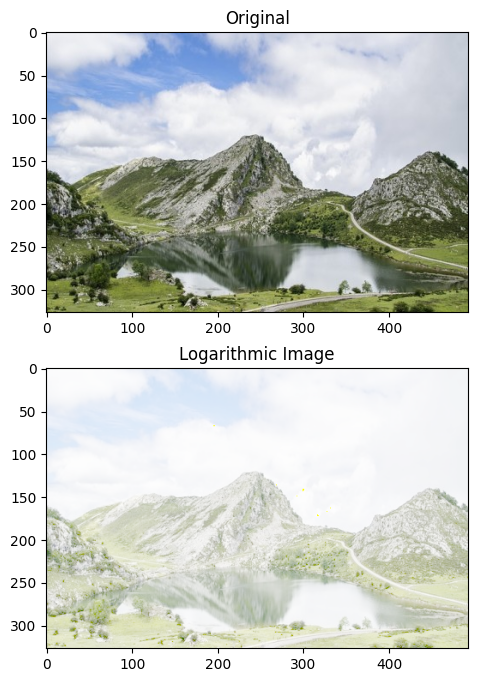

In [70]:
fig = plt.figure(figsize=(8, 8))

# Subplot for original image
a=fig.add_subplot(2,1,1)
imgplot = plt.imshow(orig_img)
a.set_title('Original')

a = fig.add_subplot(2,1,2)
imgplot = plt.imshow(log_img)
a.set_title('Logarithmic Image')

plt.show()

## Image Binarizer (Thresholding) <a class="anchor" id="bin"></a>

Binarize pixels (set pixel values to 0 or 1) according to a threshold.

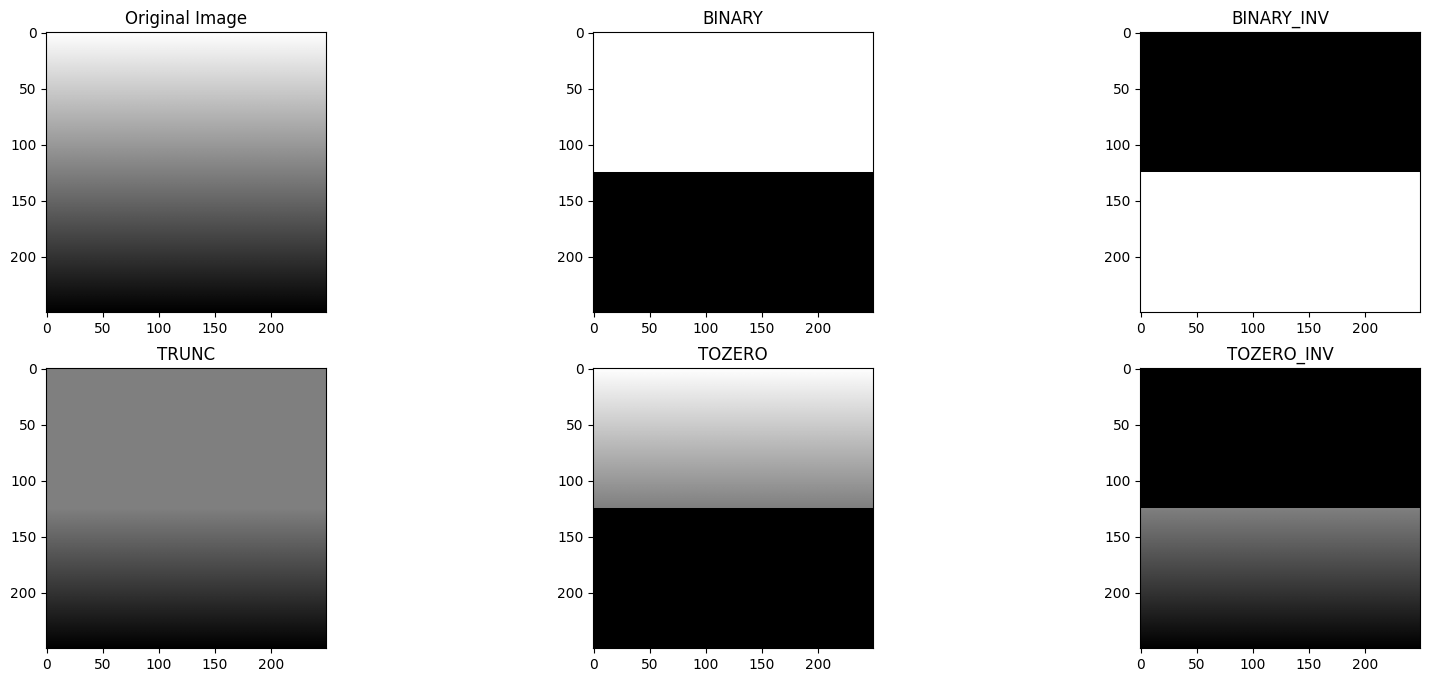

In [71]:
orig_img = cv2.imread('data/linear_gradient.png')
orig_img = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)

ret,thresh1 = cv2.threshold(orig_img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(orig_img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(orig_img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(orig_img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(orig_img,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [orig_img, thresh1, thresh2, thresh3, thresh4, thresh5]
n = np.arange(6)

fig = plt.figure(figsize=(20, 8))
for i in n:
  plt.subplot(2,3,i+1), plt.imshow(images[i],'gray')
  plt.title(titles[i])

plt.show()

## Image Quantizer  <a class="anchor" id="quant"></a>

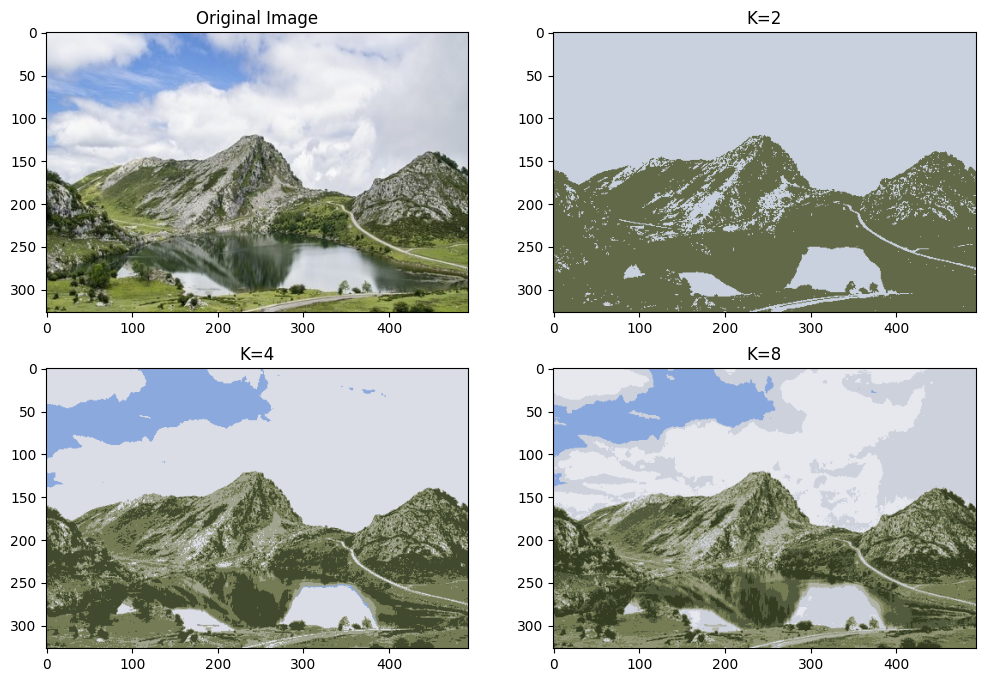

In [72]:
orig_img = cv2.imread('data/image.jpg')

Z = orig_img.reshape((-1,3))

# convert to np.float32
Z = np.float32(Z)

# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
def colorQuant(Z, K, criteria):

   ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

   # Now convert back into uint8, and make original image
   center = np.uint8(center)
   res = center[label.flatten()]
   res2 = res.reshape((orig_img.shape))
   return res2
res1 = colorQuant(Z, 2, criteria)
res2 = colorQuant(Z, 5, criteria)
res3 = colorQuant(Z, 8, criteria)

fig = plt.figure(figsize=(12, 8))

plt.subplot(221),plt.imshow(cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(222),plt.imshow(cv2.cvtColor(res1, cv2.COLOR_BGR2RGB))
plt.title('K=2')

plt.subplot(223),plt.imshow(cv2.cvtColor(res2, cv2.COLOR_BGR2RGB))
plt.title('K=4')

plt.subplot(224),plt.imshow(cv2.cvtColor(res3, cv2.COLOR_BGR2RGB))
plt.title('K=8')

plt.show()

## Exercises  <a class="anchor" id="exer"></a>

### 1. Transformaciones pixel a pixel

**a. Ajuste de brillo**

Modificar el brillo de una imagen puede mejorar la visibilidad de los detalles en áreas oscuras o claras.

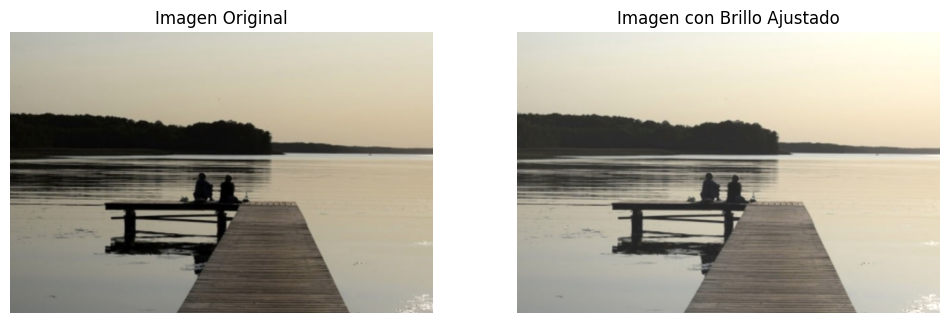

In [73]:
# Cargar la imagen
imagen = cv2.imread('data/lake.jpg')

# Ajustar el brillo
valor = 35
imagen_ajustada = cv2.convertScaleAbs(imagen, alpha=1, beta=valor)

# Convertir las imágenes a RGB para mostrarlas correctamente con matplotlib
imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
imagen_ajustada_rgb = cv2.cvtColor(imagen_ajustada, cv2.COLOR_BGR2RGB)

# Mostrar las imágenes original y ajustada
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Imagen original
axs[0].imshow(imagen_rgb)
axs[0].set_title('Imagen Original')
axs[0].axis('off')

# Imagen con brillo ajustado
axs[1].imshow(imagen_ajustada_rgb)
axs[1].set_title('Imagen con Brillo Ajustado')
axs[1].axis('off')

plt.show()


**b. Ajuste de contraste**

El ajuste de contraste mejora la separación entre diferentes niveles de intensidad en una imagen.

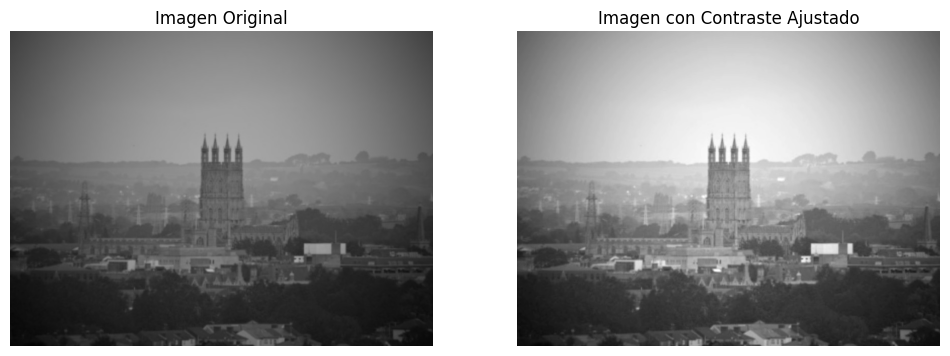

In [74]:
# Cargar la imagen
imagen = cv2.imread('data/unplash.jpg')

# Ajustar el contraste
alfa = 1.5
imagen_ajustada = cv2.convertScaleAbs(imagen, alpha=alfa, beta=0)

# Convertir las imágenes a RGB para mostrarlas correctamente con matplotlib
imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
imagen_ajustada_rgb = cv2.cvtColor(imagen_ajustada, cv2.COLOR_BGR2RGB)

# Mostrar las imágenes original y ajustada
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Imagen original
axs[0].imshow(imagen_rgb)
axs[0].set_title('Imagen Original')
axs[0].axis('off')

# Imagen con contraste ajustado
axs[1].imshow(imagen_ajustada_rgb)
axs[1].set_title('Imagen con Contraste Ajustado')
axs[1].axis('off')

plt.show()



**c. Desenfoque Gaussiano**

El desenfoque gaussiano se utiliza para reducir el ruido y los detalles de alta frecuencia.

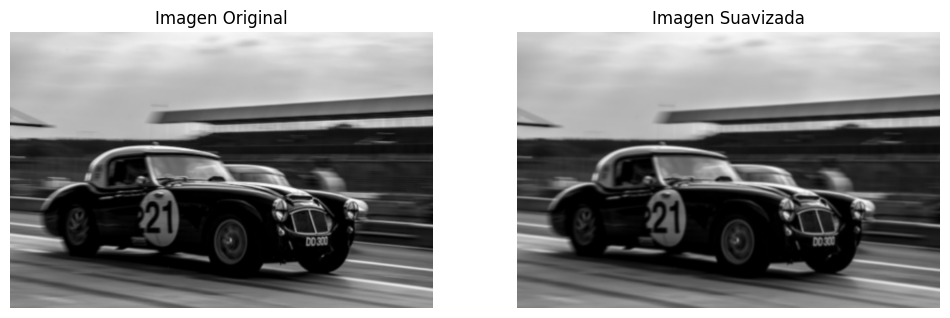

In [75]:
# Cargar la imagen
imagen = cv2.imread('data/car.jpg')

# Aplicar desenfoque gaussiano
imagen_ajustada = cv2.GaussianBlur(imagen, (5, 5), 0)

# Convertir las imágenes a RGB para mostrarlas correctamente con matplotlib
imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
imagen_ajustada_rgb = cv2.cvtColor(imagen_ajustada, cv2.COLOR_BGR2RGB)

# Mostrar las imágenes original y suavizada
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Imagen original
axs[0].imshow(imagen_rgb)
axs[0].set_title('Imagen Original')
axs[0].axis('off')

# Imagen suavizada
axs[1].imshow(imagen_ajustada_rgb)
axs[1].set_title('Imagen Suavizada')
axs[1].axis('off')

plt.show()



### 2. Aplicación de negativo de imagen

Aplicación: El negativo de una imagen se obtiene invirtiendo los valores de cada pixel. Una de sus aplicaciones en la vida real es en el proceso de digitalización de película fotográfica, donde el negativo se convierte en una imagen positiva.

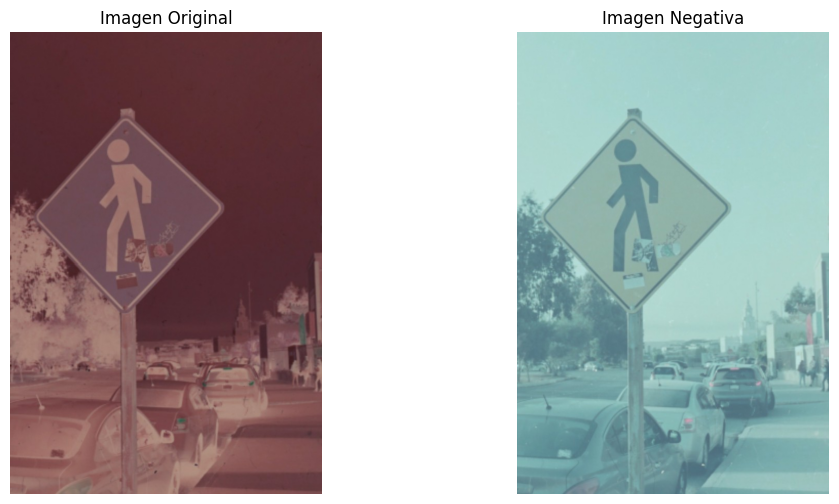

In [76]:
# Cargar la imagen
orig_img = cv2.imread('data/negative.jpg')

# Crear la imagen negativa
img_neg = 255 - orig_img

# Convertir las imágenes a RGB para mostrarlas correctamente con matplotlib
imagen_rgb = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)
imagen_negativa_rgb = cv2.cvtColor(img_neg, cv2.COLOR_BGR2RGB)

# Mostrar las imágenes original y negativa
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Imagen original
axs[0].imshow(imagen_rgb)
axs[0].set_title('Imagen Original')
axs[0].axis('off')

# Imagen negativa
axs[1].imshow(imagen_negativa_rgb)
axs[1].set_title('Imagen Negativa')
axs[1].axis('off')

plt.show()

Justificación: El negativo de una imagen se obtiene invirtiendo los valores de los píxeles, lo que puede ser útil para análisis de imágenes y corrección de colores.

### 3. Aplicación de correción gamma

La correción gamma sirve para mejorar la visibilidad de detalles en imágenes bajoexpuestas o sobreexpuestas, pues se trata de una transformación matemática que funciona pixel a pixel normalizando los valores de intensidad y potenciandolos por un factor gamma que cuando es menor a 1 aclara (resalta áreas oscuras) y si es mayor a 1 oscurece (atenúa áreas saturadas en brillo). 

$$ I_{\text{salida}} = \left( \frac{I_{\text{entrada}}}{255} \right)^\gamma \times 255 $$








Una aplicación de esta transformación es en sistemas de reconocimiento facial bajo condiciones de iluminación variables, pues las imagenes de entrenamiento pueden variar significativamente en brillo y contraste debido a las diferentes condiciones de iluminación. Estas variaciones pueden afectar la calidad de las características extraídas, como bordes, texturas y patrones importantes para un modelo.

Aplicación:

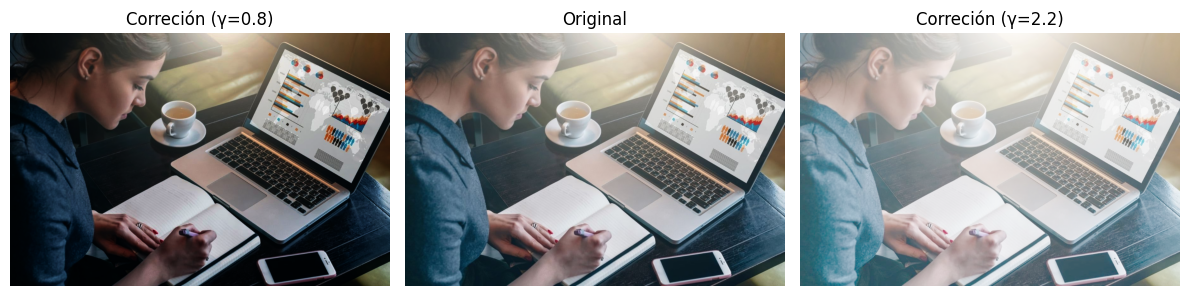

In [77]:
""" Creo una función para no ser repetitivo """

def gamma_correction(image, gamma):
    inv_gamma = 1.0 / gamma
    table = np.array([(i / 255.0) ** inv_gamma * 255 for i in range(256)]).astype("uint8")
    
    return cv2.LUT(image, table)

image = cv2.imread("data/imagen4.jpg")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Aplico correción gamma convalor 2.2 y con 0.8
corrected_image_1 = gamma_correction(image, 2.2)
corrected_image_rgb = cv2.cvtColor(corrected_image_1, cv2.COLOR_BGR2RGB)
corrected_image_2 = gamma_correction(image, 0.5)
corrected_image_rgb_2 = cv2.cvtColor(corrected_image_2, cv2.COLOR_BGR2RGB)


# Mostrar las imágenes original y corregida en subparcelas
plt.figure(figsize=(12, 6))

# Imagen original
plt.subplot(1, 3, 1)
plt.imshow(corrected_image_rgb_2)
plt.title(f"Correción (γ=0.8)")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(image_rgb)
plt.title("Original")
plt.axis("off")

# Imagen corregida
plt.subplot(1, 3, 3)
plt.imshow(corrected_image_rgb)
plt.title(f"Correción (γ=2.2)")
plt.axis("off")

# Mostrar la figura
plt.tight_layout()
plt.show()


### 4. Aplicación de sustracción de imágenes

La sustracción de imágenes es una operación común en el procesamiento de imágenes y visión por computadora que implica restar los valores de píxeles de dos imágenes por ende el tamaño debe coincidir para hacer la operación pixel a pixel.

$$ I_{\text{resultado}}(x, y) = |I_1(x, y) - I_2(x, y)| $$

Se trata de una técnica fundamental en visión por computadora que se utiliza para extraer objetos en movimiento de escenas estáticas. Esta técnica implica la comparación de imágenes de video en tiempo real o secuencias de imágenes, donde el fondo se elimina y solo los cambios o el movimiento se destacan. Es ampliamente utilizada en aplicaciones como la vigilancia, el seguimiento de objetos y la detección de anomalías

Aplicación:

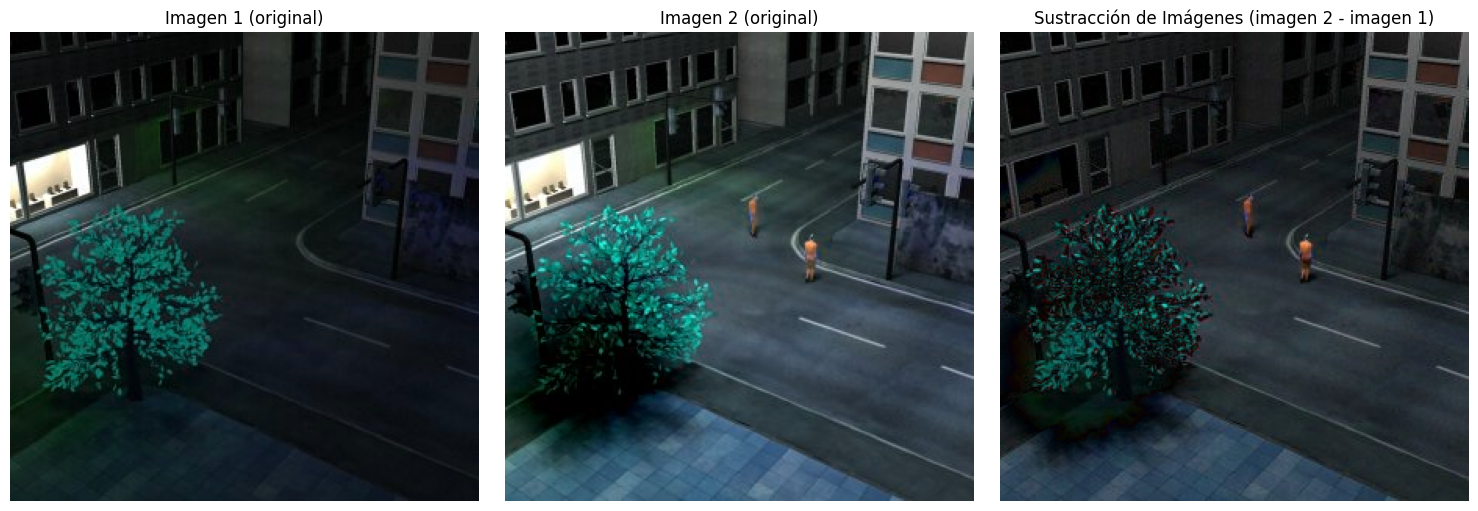

In [78]:
image1 = cv2.imread("data/imagen_5.jpg")
image2 = cv2.imread("data/imagen_6.jpg")


# Realizar la sustracción de imágenes
subtracted_image = cv2.absdiff(image2, image1)

# Mostrar las imágenes original, comparativa y restada
plt.figure(figsize=(15, 5))

# Imagen original 1
plt.subplot(1, 3, 1)
plt.imshow(image1)
plt.title("Imagen 1 (original)")
plt.axis("off")

# Imagen original 2
plt.subplot(1, 3, 2)
plt.imshow(image2)
plt.title("Imagen 2 (original)")
plt.axis("off")

# Imagen resultado
plt.subplot(1, 3, 3)
plt.imshow(subtracted_image)
plt.title("Sustracción de Imágenes (imagen 2 - imagen 1)")
plt.axis("off")

# Mostrar las figuras
plt.tight_layout()
plt.show()


## References  <a class="anchor" id="refer"></a>

* Gonzalez, R. & Woods, R. (2018). Digital Image Processing.  4° Edition. Pearson.
* Osman, I., et al. (2025). BgSub: A background subtraction model for effective moving object detection. The Conference on Computer Vision and Pattern Recognition (CVPR) Workshop. Retrieved from https://openaccess.thecvf.com/content_CVPR_2025/html/Osman_BgSub_A_Background_Subtraction_Model_for_Effective_Moving_Object_Detection_CVPR_2025_paper.html